<a href="https://colab.research.google.com/github/Vedant2100/w26/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.

In [3]:
from datasets import load_dataset
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

dataset = load_dataset("ylecun/mnist")

def format_data(split, mean=None, std=None):
    images = np.array([np.array(img).flatten() for img in split["image"]])
    if mean is None or std is None:
        mean = np.mean(images, axis=0)
        std = np.std(images, axis=0)
    std_copy = std.copy()
    std_copy[std_copy == 0] = 1.0
    X = (images - mean) / std_copy
    X = np.hstack([X, np.ones((X.shape[0], 1))])
    y = np.array([int(l > 4) for l in split["label"]])
    return X, y, mean, std

Q2. Linear Classifier

In [4]:
X_train, y_train, train_mean, train_std = format_data(dataset["train"])
X_test, y_test, _, _ = format_data(dataset["test"], train_mean, train_std)
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

def minibatch_sgd(ITR, B, lr, X_train, y_train, X_test, y_test):
    W = np.random.normal(0, 1/np.sqrt(785), (1, 785))
    loss_hist, acc_hist = [], []
    start = time.time()
    N_tr = len(X_train)
    for t in tqdm(range(ITR)):
        idx = np.random.choice(N_tr, B, replace=True)
        X_b = X_train[idx]
        y_b = y_train[idx].reshape(-1, 1)
        y_p = X_b @ W.T
        grad = (1/B) * (y_p - y_b).T @ X_b
        W -= lr * grad
        loss = 0.5 * np.mean((y_p - y_b)**2)
        loss_hist.append(loss)
        test_scores = X_test @ W.T
        test_preds = (test_scores.flatten() > 0.5).astype(int)
        acc = np.mean(test_preds == y_test)
        acc_hist.append(acc)
    return W, loss_hist, acc_hist, (time.time() - start)

Shape of y_train: (60000,)
Shape of y_test: (10000,)


100%|██████████| 50000/50000 [00:55<00:00, 899.05it/s] 


lr=0.001: Time=55.62s, Accuracy=0.5233


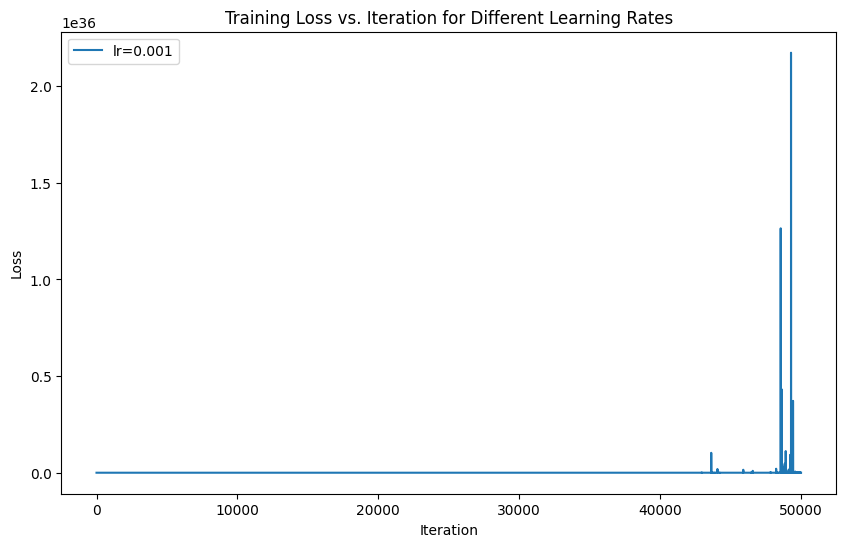

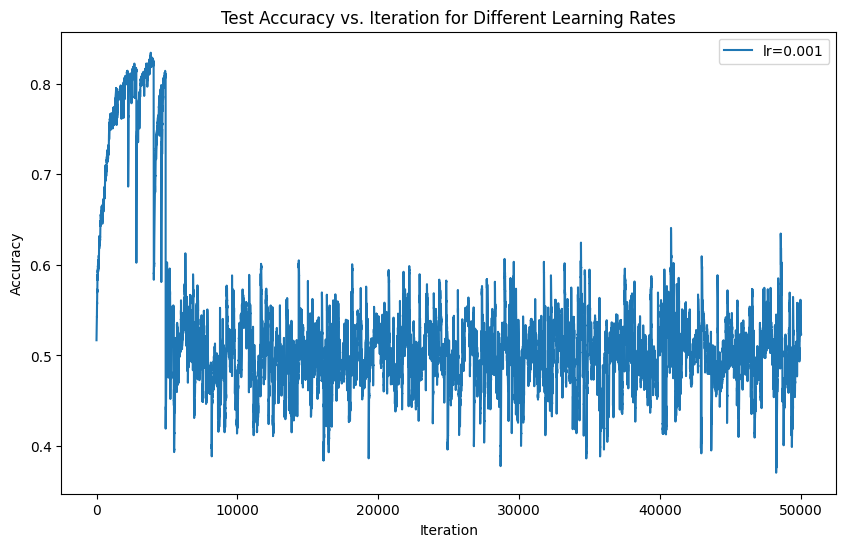

In [5]:
B = 10
lrs = 0.001
ITR = 50000

plt.figure(figsize=(10, 6))
plt.title("Training Loss vs. Iteration for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.figure(figsize=(10, 6))
plt.title("Test Accuracy vs. Iteration for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")

loss_fig = plt.figure(1)
ax_loss = loss_fig.gca()
acc_fig = plt.figure(2)
ax_acc = acc_fig.gca()


_, losses, accs, dur = minibatch_sgd(ITR, B, lr, X_train, y_train, X_test, y_test)
print(f"lr={lr}: Time={dur:.2f}s, Accuracy={accs[-1]:.4f}")

ax_loss.plot(losses, label=f"lr={lr}")
ax_acc.plot(accs, label=f"lr={lr}")

ax_loss.legend()
ax_acc.legend()

loss_fig.show()
acc_fig.show()

100%|██████████| 50000/50000 [00:55<00:00, 900.99it/s] 


lr=0.005: Time=55.50s, Accuracy=0.4894


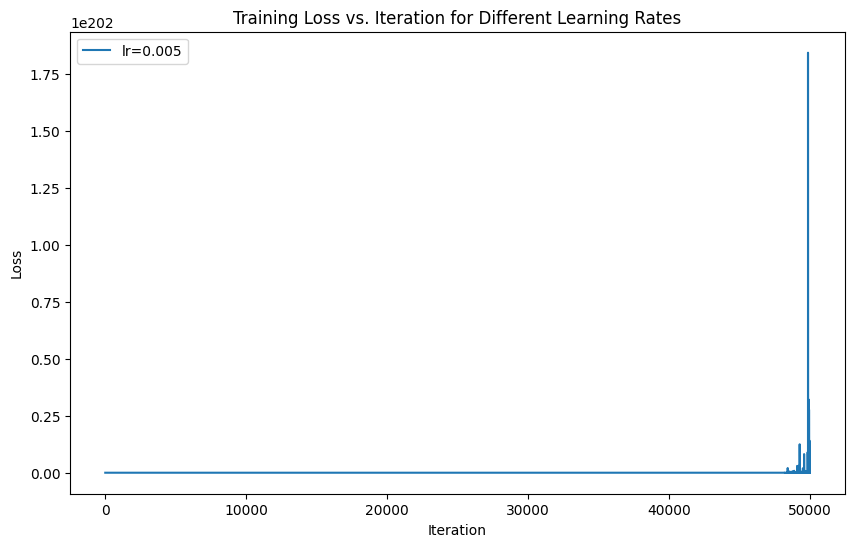

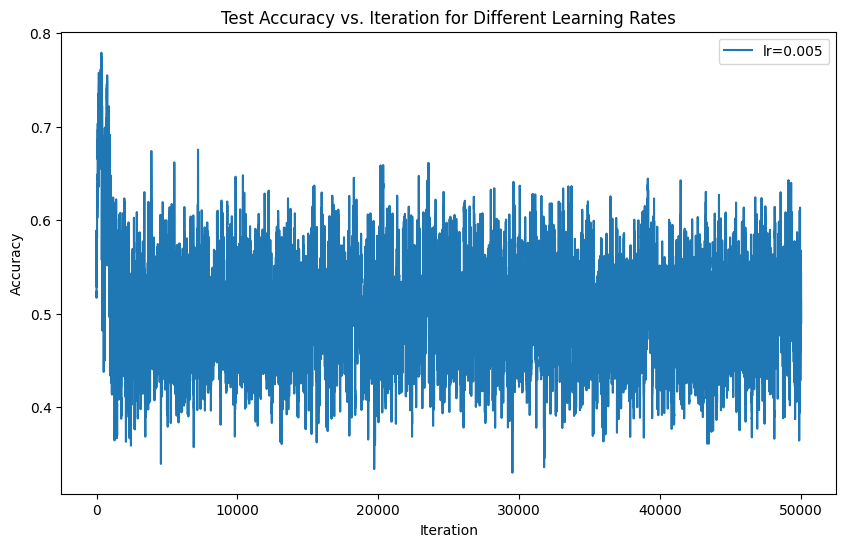

In [9]:
B = 10
lr = 0.005
ITR = 50000

plt.figure(figsize=(10, 6))
plt.title("Training Loss vs. Iteration for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.figure(figsize=(10, 6))
plt.title("Test Accuracy vs. Iteration for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")

loss_fig = plt.figure(1)
ax_loss = loss_fig.gca()
acc_fig = plt.figure(2)
ax_acc = acc_fig.gca()


_, losses, accs, dur = minibatch_sgd(ITR, B, lr, X_train, y_train, X_test, y_test)
print(f"lr={lr}: Time={dur:.2f}s, Accuracy={accs[-1]:.4f}")

ax_loss.plot(losses, label=f"lr={lr}")
ax_acc.plot(accs, label=f"lr={lr}")

ax_loss.legend()
ax_acc.legend()

loss_fig.show()
acc_fig.show()

100%|██████████| 50000/50000 [00:58<00:00, 859.08it/s]


lr=0.001: Time=58.20s, Accuracy=0.4045


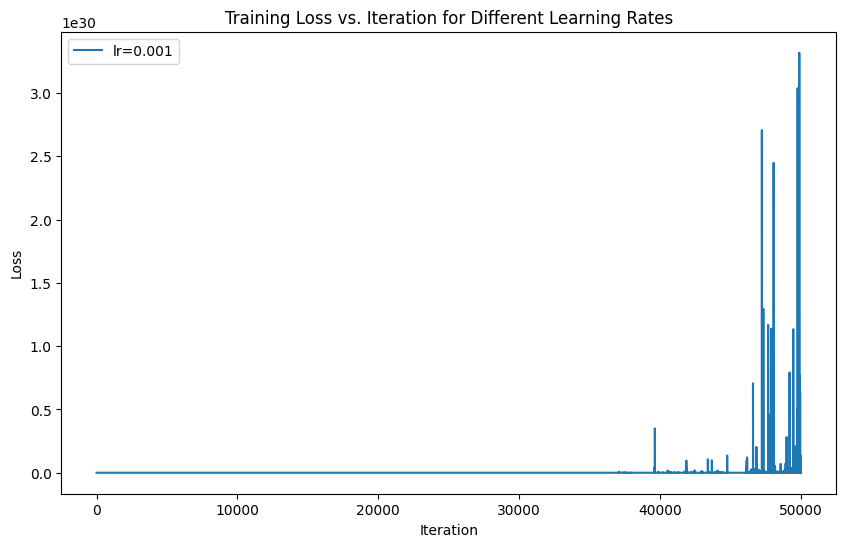

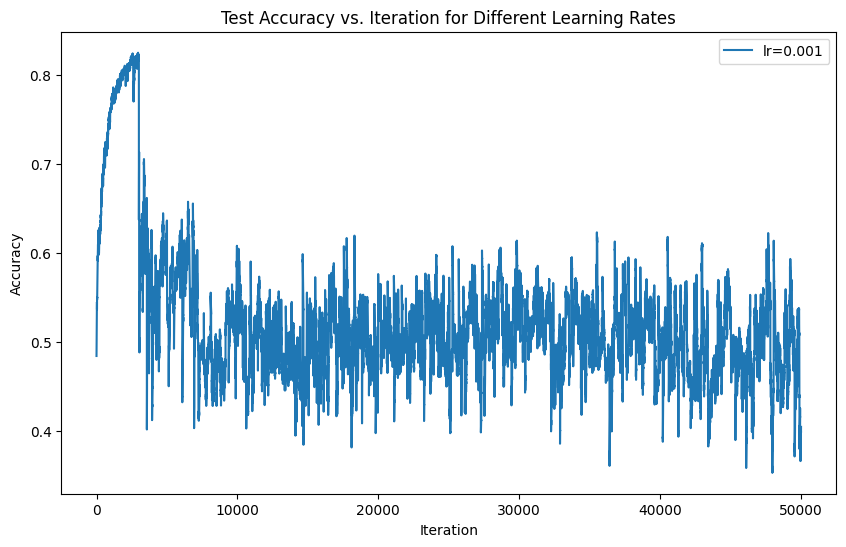

In [7]:
B = 10
lr = 0.01
ITR = 50000

plt.figure(figsize=(10, 6))
plt.title("Training Loss vs. Iteration for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.figure(figsize=(10, 6))
plt.title("Test Accuracy vs. Iteration for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")

loss_fig = plt.figure(1)
ax_loss = loss_fig.gca()
acc_fig = plt.figure(2)
ax_acc = acc_fig.gca()


_, losses, accs, dur = minibatch_sgd(ITR, B, lr, X_train, y_train, X_test, y_test)
print(f"lr={lr}: Time={dur:.2f}s, Accuracy={accs[-1]:.4f}")

ax_loss.plot(losses, label=f"lr={lr}")
ax_acc.plot(accs, label=f"lr={lr}")

ax_loss.legend()
ax_acc.legend()

loss_fig.show()
acc_fig.show()

Test accuracy of the linear classifier is 0.85

Q3. Neural Network with. k = 5, 50, 200 hidden units


In [ ]:
def ReLU(x):
    return np.maximum(0, x)

def minibatch_sgd_nn(ITR, B, lr, X_train, y_train, X_test, y_test, k):
    W1 = np.random.normal(0, 1/np.sqrt(785), (k, 785))
    W2 = np.random.normal(0, 1/np.sqrt(k), (1, k))
    loss_hist, acc_hist = [], []
    start = time.time()
    N_tr = len(X_train)
    for t in tqdm(range(ITR)):
        idx = np.random.choice(N_tr, B, replace=True)
        X_b = X_train[idx]
        y_b = y_train[idx].reshape(-1, 1)

        z = X_b @ W1.T
        a = ReLU(z)
        y_p = a @ W2.T

        grad_W2 = (1/B) * (y_p - y_b).T @ a
        grad_a = (1/B) * (y_p - y_b) @ W2
        grad_z = grad_a * (z > 0)
        grad_W1 = (1/B) * grad_z.T @ X_b

        W1 -= lr * grad_W1
        W2 -= lr * grad_W2

        loss = 0.5 * np.mean((y_p - y_b)**2)
        loss_hist.append(loss)

        test_scores_hidden = X_test @ W1.T
        test_scores_activated = ReLU(test_scores_hidden)
        test_scores = test_scores_activated @ W2.T

        test_preds = (test_scores.flatten() > 0.5).astype(int)
        acc = np.mean(test_preds == y_test)
        acc_hist.append(acc)

    return W1, W2, loss_hist, acc_hist, (time.time() - start)

Training Neural Network with k=5 hidden units, B=10, ITR=50000, lr=0.001


100%|██████████| 50000/50000 [02:56<00:00, 283.82it/s]


NN (k=5, lr=0.001): Time=176.17s, Final Test Accuracy=0.8316
Training Neural Network with k=50 hidden units, B=10, ITR=50000, lr=0.001


100%|██████████| 50000/50000 [06:35<00:00, 126.39it/s]


NN (k=50, lr=0.001): Time=395.60s, Final Test Accuracy=0.8733
Training Neural Network with k=200 hidden units, B=10, ITR=50000, lr=0.001


100%|██████████| 50000/50000 [19:17<00:00, 43.21it/s]


NN (k=200, lr=0.001): Time=1157.06s, Final Test Accuracy=0.8978


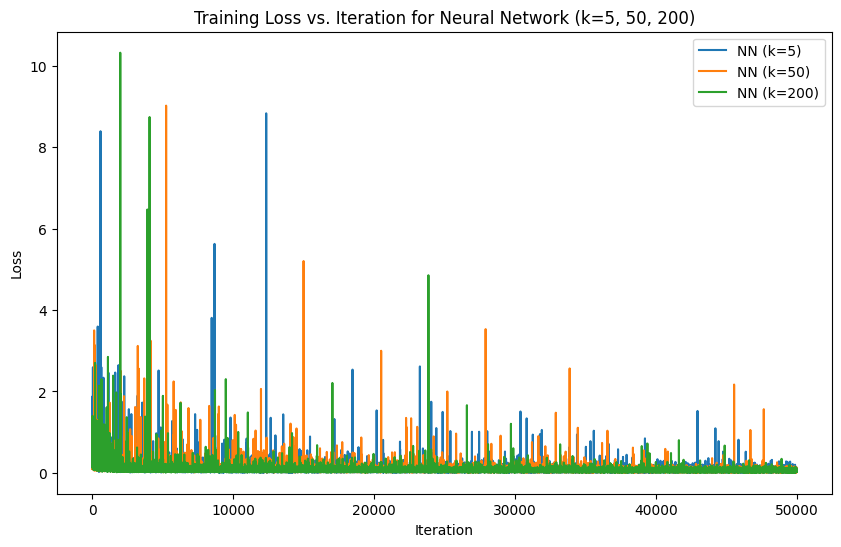

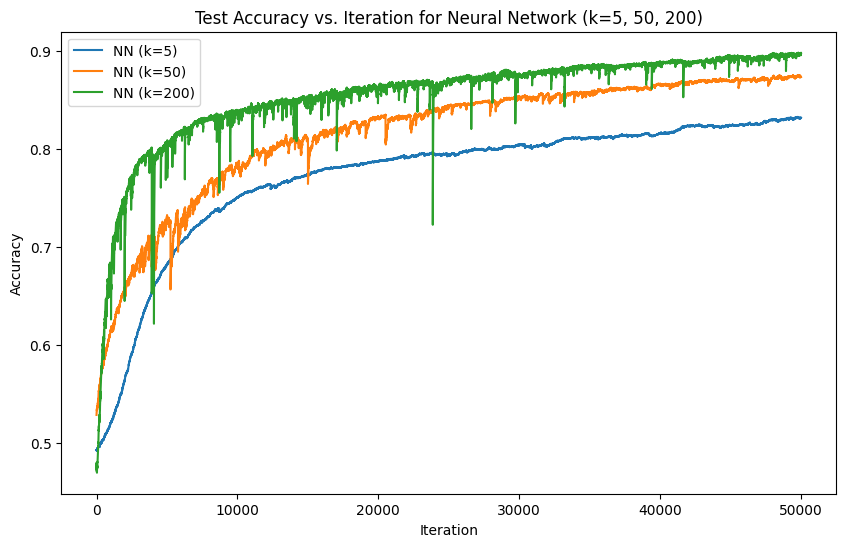

In [ ]:
lr_nn = 0.001
k_values = [5, 50, 200]
results = {}

plt.figure(figsize=(10, 6))
plt.title("Training Loss vs. Iteration for Neural Network (k=5, 50, 200)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
loss_fig = plt.gca()

plt.figure(figsize=(10, 6))
plt.title("Test Accuracy vs. Iteration for Neural Network (k=5, 50, 200)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
acc_fig = plt.gca()

for k in k_values:
  print(f"Training Neural Network with k={k} hidden units, B={B}, ITR={ITR}, lr={lr_nn}")
  W1_nn, W2_nn, losses_nn, accs_nn, dur_nn = minibatch_sgd_nn(ITR, B, lr_nn, X_train, y_train, X_test, y_test, k)
  results[k] = {'losses': losses_nn, 'accs': accs_nn, 'dur': dur_nn}
  print(f"NN (k={k}, lr={lr_nn}): Time={dur_nn:.2f}s, Final Test Accuracy={accs_nn[-1]:.4f}")

  loss_fig.plot(losses_nn, label=f"NN (k={k})")
  acc_fig.plot(accs_nn, label=f"NN (k={k})")

loss_fig.legend()
acc_fig.legend()

plt.show()

Q4. Logistic Loss

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def minibatch_sgd_nn_logistic(ITR, B, lr, X_train, y_train, X_test, y_test, k):
    W1 = np.random.normal(0, 1/np.sqrt(X_train.shape[1]), (k, X_train.shape[1]))
    W2 = np.random.normal(0, 1/np.sqrt(k), (1, k))
    loss_hist, acc_hist = [], []
    start = time.time()
    N_tr = len(X_train)

    for t in tqdm(range(ITR)):
        idx = np.random.choice(N_tr, B, replace=True)
        X_b = X_train[idx]
        y_b = y_train[idx].reshape(-1, 1)
        z = X_b @ W1.T
        a = ReLU(z)
        logits = a @ W2.T
        probs = sigmoid(logits)
        delta = probs - y_b
        grad_W2 = (1/B) * delta.T @ a
        grad_a = (1/B) * delta @ W2
        grad_z = grad_a * (z > 0)
        grad_W1 = (1/B) * grad_z.T @ X_b

        W1 -= lr * grad_W1
        W2 -= lr * grad_W2
        eps = 1e-8
        loss = -np.mean(y_b * np.log(probs+eps) + (1 - y_b) * np.log(1 - probs+eps))
        loss_hist.append(loss)
        test_hidden = X_test @ W1.T
        test_act = ReLU(test_hidden)
        test_logits = test_act @ W2.T
        test_probs = sigmoid(test_logits)

        test_preds = (test_probs.flatten() > 0.5).astype(int)
        acc = np.mean(test_preds == y_test)
        acc_hist.append(acc)

    return W1, W2, loss_hist, acc_hist, (time.time() - start)


Training Neural Network with k=5 hidden units, B=10, ITR=50000, lr=0.001


100%|██████████| 50000/50000 [03:01<00:00, 274.89it/s]


NN (k=5, lr=0.001): Time=181.90s, Final Test Accuracy=0.9063
Training Neural Network with k=50 hidden units, B=10, ITR=50000, lr=0.001


100%|██████████| 50000/50000 [06:39<00:00, 125.20it/s]


NN (k=50, lr=0.001): Time=399.37s, Final Test Accuracy=0.9220
Training Neural Network with k=200 hidden units, B=10, ITR=50000, lr=0.001


100%|██████████| 50000/50000 [19:23<00:00, 42.96it/s]


NN (k=200, lr=0.001): Time=1163.82s, Final Test Accuracy=0.9308


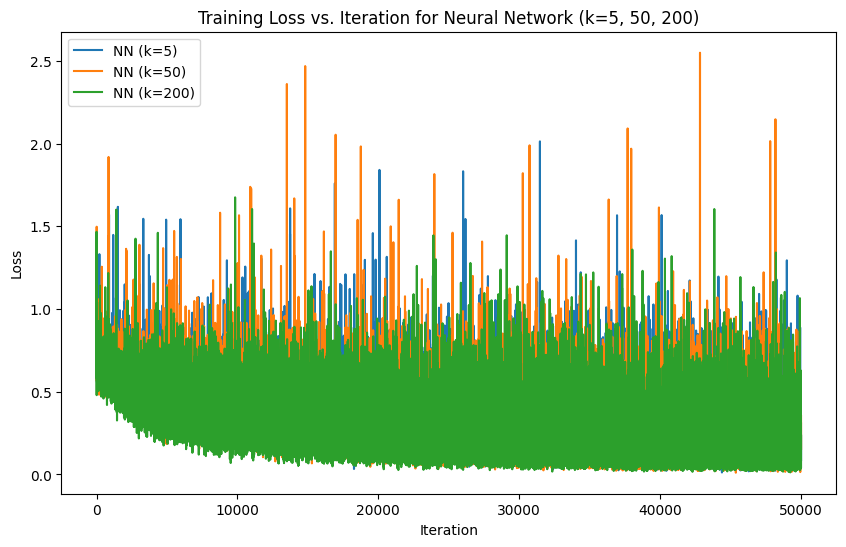

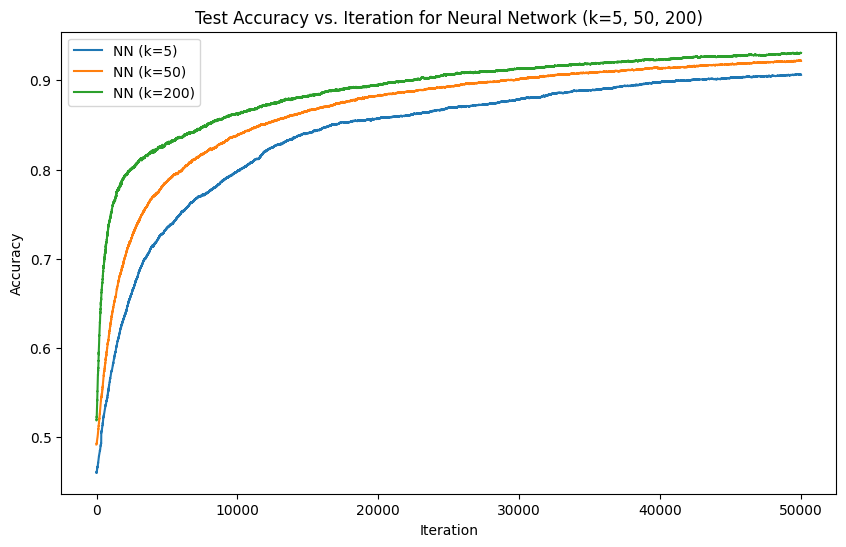

In [ ]:
lr_nn = 0.001
k_values = [5, 50, 200]
results = {}

plt.figure(figsize=(10, 6))
plt.title("Training Loss vs. Iteration for Neural Network (k=5, 50, 200)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
loss_fig = plt.gca()

plt.figure(figsize=(10, 6))
plt.title("Test Accuracy vs. Iteration for Neural Network (k=5, 50, 200)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
acc_fig = plt.gca()

for k in k_values:
  print(f"Training Neural Network with k={k} hidden units, B={B}, ITR={ITR}, lr={lr_nn}")
  W1_nn, W2_nn, losses_nn, accs_nn, dur_nn = minibatch_sgd_nn_logistic(ITR, B, lr_nn, X_train, y_train, X_test, y_test, k)
  results[k] = {'losses': losses_nn, 'accs': accs_nn, 'dur': dur_nn}
  print(f"NN (k={k}, lr={lr_nn}): Time={dur_nn:.2f}s, Final Test Accuracy={accs_nn[-1]:.4f}")

  loss_fig.plot(losses_nn, label=f"NN (k={k})")
  acc_fig.plot(accs_nn, label=f"NN (k={k})")

loss_fig.legend()
acc_fig.legend()

plt.show()